# Image Segmentation with skimage

Using the tutorial here: https://www.youtube.com/watch?v=pZATswy_IsQ

Extract or identify a subset of data that is interesting by seperating an image into one or more regions of interest. I want a face, an organ, a cell, whatever! 

I will look at supervised and unsupervised segmentation. 

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

# convenience function for plotting
def image_show(image, nrows=1, ncols=1, cmap='gray', **kwargs):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,16))
    ax.imshow(image, cmap=cmap)
    ax.axis('off')
    return fig, ax

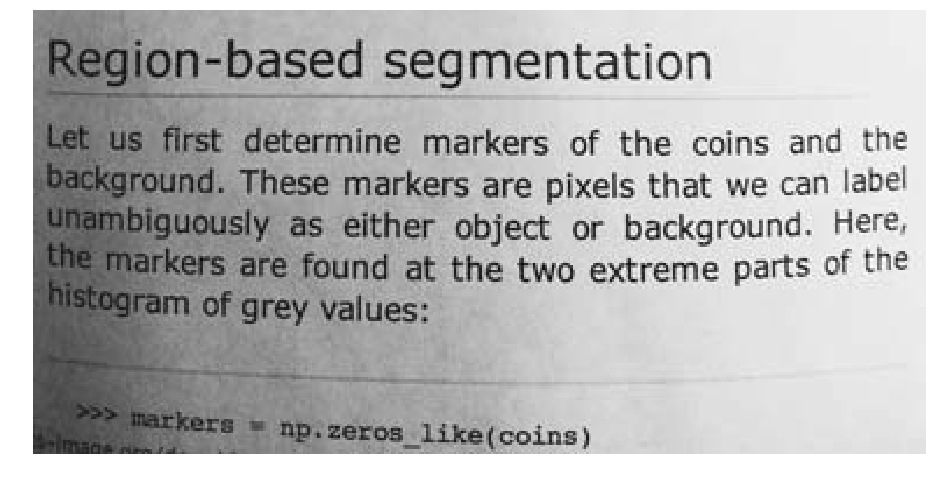

In [8]:
text = data.page()
image_show(text);

Let's find a useful value for finding a threshold between the white and black pixels on the image. We will use a histogram for this to plot the number of times values within a certain range appear. 

Use `numpy.ravel()` to create a 1-D array.

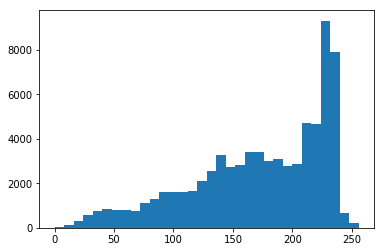

In [13]:
fig, ax = plt.subplots(1,1)
ax.hist(text.ravel(), bins=32, range=[0,256]);

An ideal segmentation case is bimodal. This one is quite tricky.

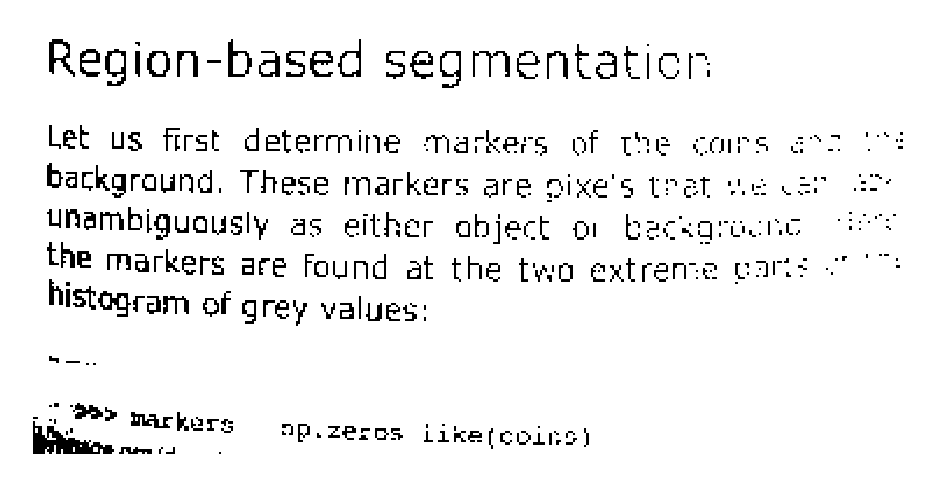

In [20]:
text_segmented = text > 70
image_show(text_segmented);

157


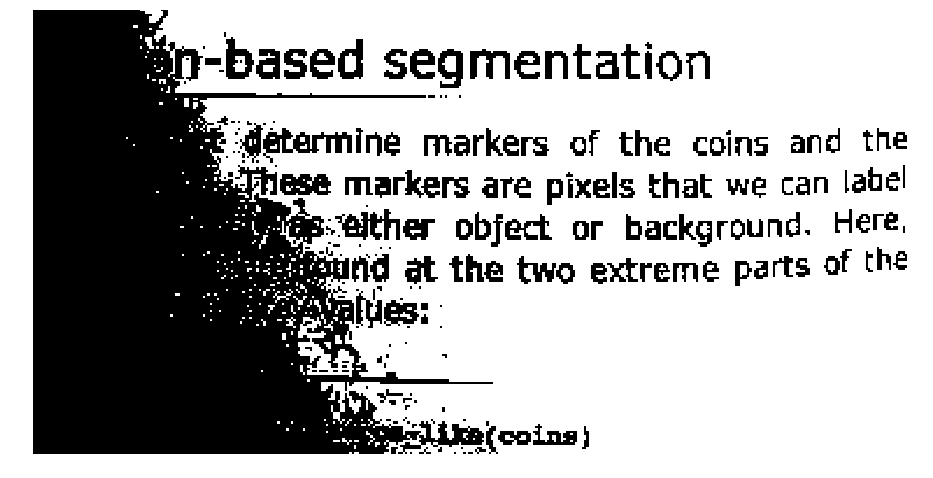

In [24]:
text_threshold = filters.threshold_otsu(text)
print(text_threshold)
image_show(text > text_threshold);

Compute a threshold mask image based on local pixel neighbourhood. Must use odd size of pixel neighbourhood for **block_size**.  Gaussian filter is used as default. **Offset** is really useful, it is a constant substracted from the weighted mean. 

[[123.25955376 123.22786416 123.16658406 ... 231.80164088 231.81663801
  231.82412813]
 [123.11792862 123.08526774 123.02209311 ... 231.7986707  231.81369529
  231.82119966]
 [122.83724942 122.80266035 122.73572423 ... 231.79267038 231.80774907
  231.81528151]
 ...
 [ 56.38900964  56.41070711  56.45365861 ... 220.00042456 220.01864982
  220.02783904]
 [ 56.1677428   56.18957863  56.23280001 ... 219.93497824 219.95289807
  219.96193224]
 [ 56.05602039  56.07792093  56.12126833 ... 219.9018575  219.91962127
  219.92857622]]


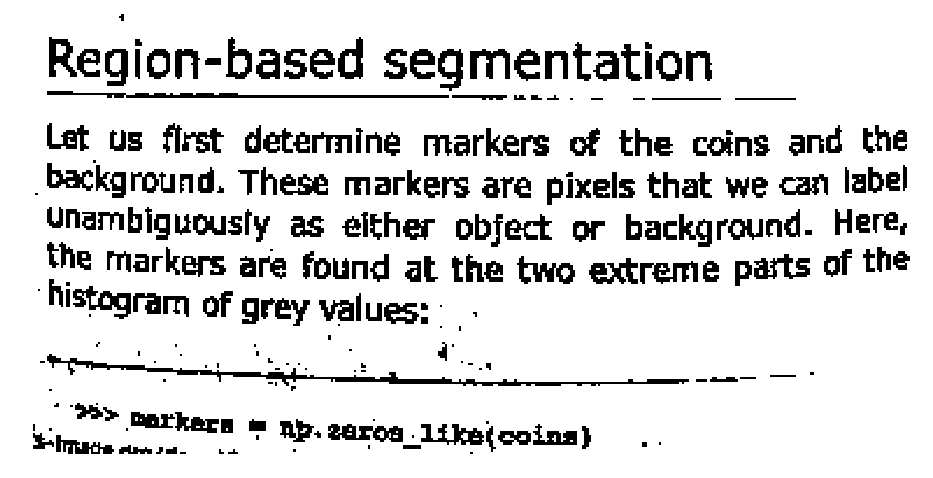

In [38]:
text_threshold2 = filters.threshold_local(text, 53, offset=7)
print(text_threshold2)
image_show(text > text_threshold2);